<a href="https://colab.research.google.com/github/ManantenaKiady/Pytorch-fundamentals/blob/master/Notebooks/pytorch_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Your Turn !!

## Objective: 

- Train a deep learning model to classify images from CIFAR10 dataset
https://www.cs.toronto.edu/~kriz/cifar.html

## Setup

In [3]:
!pip3 install torch torchvision torchaudio

# Check the installed version 
import torch
torch.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'1.13.0+cu116'

Configure

In [4]:
# Check if GPU are available and set the device to use it
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


## Load the dataset

In [11]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets 

from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [12]:
# To retrieve the dataset
training_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=transform,
)

test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=transform,
)

Files already downloaded and verified
Files already downloaded and verified


In [13]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

We can pass the Dataset as an argument to DataLoader in order to:

- Make the Dataset iterable
- To supports automatic batching and sampling
* To make it shuffleable
- To support multiprocess data loading

In [14]:
import matplotlib.pyplot as plt
import numpy as np

BATCH_SIZE = 5

# Create data loaders
train_dataloader = DataLoader(training_data, batch_size=BATCH_SIZE)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE)


**Show some images from the dataset**

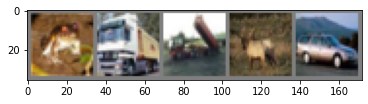

frog  truck truck deer  car  


In [16]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(BATCH_SIZE)))

## Build a CNN (Convolutional Neural Network ) model

- use Conv2d layer from nn module

<font color='green'> Q1: Import all required module and functions </font>

In [18]:
# ------ you code here --------
import torch.nn as nn

<font color='green'> Q2: Uncomment and complete the following code </font>

In [20]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # in_channels, out_channels, kernel_size
        # https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
        self.conv_stack = nn.Sequential(
             nn.Conv2d(3, 6, 5),
             nn.ReLU(),
             nn.MaxPool2d(2, 2),
             nn.Conv2d(6,16,5),
             nn.ReLU(),
             nn.MaxPool2d(2, 2)
        )

        self.flatten = nn.Flatten(1)
        # -------------- Add three Linear Layers ----------------
        # ------------ first: in: 16*5*5, out = 120 -------------
        # ------------ second: in: 120, out = 84 ----------------
        # ------------ first: in: 84, out = 10 ------------------
        self.fc1 = nn.Sequential(
            nn.Linear(16 * 5 * 5, 120),
            nn.ReLU()
        )

        self.fc2 = nn.Sequential(
            nn.Linear(120, 84),
            nn.ReLU()
        )
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.conv_stack(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

<font color='green'> Q3: Initialize a network (model) </font>

In [21]:
# ----------- your code here --------------
net = Net()

<font color='green'> Q4: Define a Loss Function and optimizer </font>

- In multiclass classification we use the `CrossEntropyLoss`

- Use the `Adam` optimizer

In [22]:
# ------------ your code here --------------

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=net.parameters(), lr=0.001)

### Train the network

In [23]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.804
[1,  4000] loss: 1.560
[1,  6000] loss: 1.431
[1,  8000] loss: 1.404
[1, 10000] loss: 1.346
[2,  2000] loss: 1.295
[2,  4000] loss: 1.276
[2,  6000] loss: 1.214
[2,  8000] loss: 1.231
[2, 10000] loss: 1.200
Finished Training
